##<b> Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
#to display all the graph in the workbook 
sns.set_style("whitegrid",{'grid.linestyle': '--'})

## <b> Loading the dataset

In [2]:
data= pd.read_csv("C:\DS\Seoul-Bike-Sharing-Demand-Prediction-main\SeoulBikeData.csv", encoding = "ISO-8859-1")

In [3]:
# data= pd.read_csv("C:\\DS\\Bike_Rental_Prediction-main\\bike_rent.csv")

In [4]:
# Copy the data for backup
df = data.copy()

In [5]:
# Getting feel of the data
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
# Data shape
df.shape

(8760, 14)

In [7]:
# data dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [8]:
# Statistical info 
df.describe(include='all').transpose()


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01-12-2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


##<b> Preprocessing the data

In [9]:
# Checking null values of data 
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [10]:
# Checking duplicate
df.duplicated().sum()

0

In [11]:

df["Date"] = pd.to_datetime(df["Date"], errors='coerce')


In [12]:
# split day of week, month and year in three column

df['Weekday'] = df['Date'].dt.day_name()
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       3456 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [14]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Weekday,Day,Month,Year
8755,NaT,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,NaN,NaN,NaN,NaN
8756,NaT,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,NaN,NaN,NaN,NaN
8757,NaT,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,NaN,NaN,NaN,NaN
8758,NaT,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,NaN,NaN,NaN,NaN
8759,NaT,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,NaN,NaN,NaN,NaN


In [15]:
# import pandas as pd

# # Assuming df is your DataFrame and 'column_name' is the name of the column you're interested in
unique_values = df['Day'].unique()

print(unique_values)


[12. nan  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]


In [16]:
# Handle missing values before conversion
# df['Day'].fillna(0, inplace=True)  # Replace NaN with 0 or another value
# df['Day'] = df['Day'].astype(np.int64)

In [17]:
# df.info()

In [18]:
#df['Month'].fillna(0, inplace=True)
# df['Month'] = df['Month'].astype(np.int64)

In [19]:
#df['Year'].fillna(0, inplace=True)
# df['Year'] = df['Year'].astype(np.int64)

In [20]:
# df.info()

In [21]:
# df.head()

In [22]:
# drop the Date column
df.drop(columns=['Date'],inplace=True)

In [23]:
# df['Day'].fillna(0, inplace=True)
# df['Day'] = df['Day'].astype(np.int64)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Weekday                    3456 non-null   objec

#<b> Exploratory data analysis 

##<b> When we observe the data we realize that Hour column is a numerical column but it is a time stamp so we have to treat Hour as a categorical feature

In [25]:
# convert Hour column integer to Categorical 
# df['Hour']=df['Hour'].astype('object')

In [26]:
# Divide Data in categorical and numerical features/
# numeric_features= df.select_dtypes(exclude='object')
# categorical_features=df.select_dtypes(include='object')

In [27]:
# numeric_features.head()


In [28]:
# categorical_features.head()

In [29]:
# checking categorical column value count
# for i in categorical_features.columns:
#   print("\n ")
#   print('column name  : ', i)
#   print(df[i].value_counts())

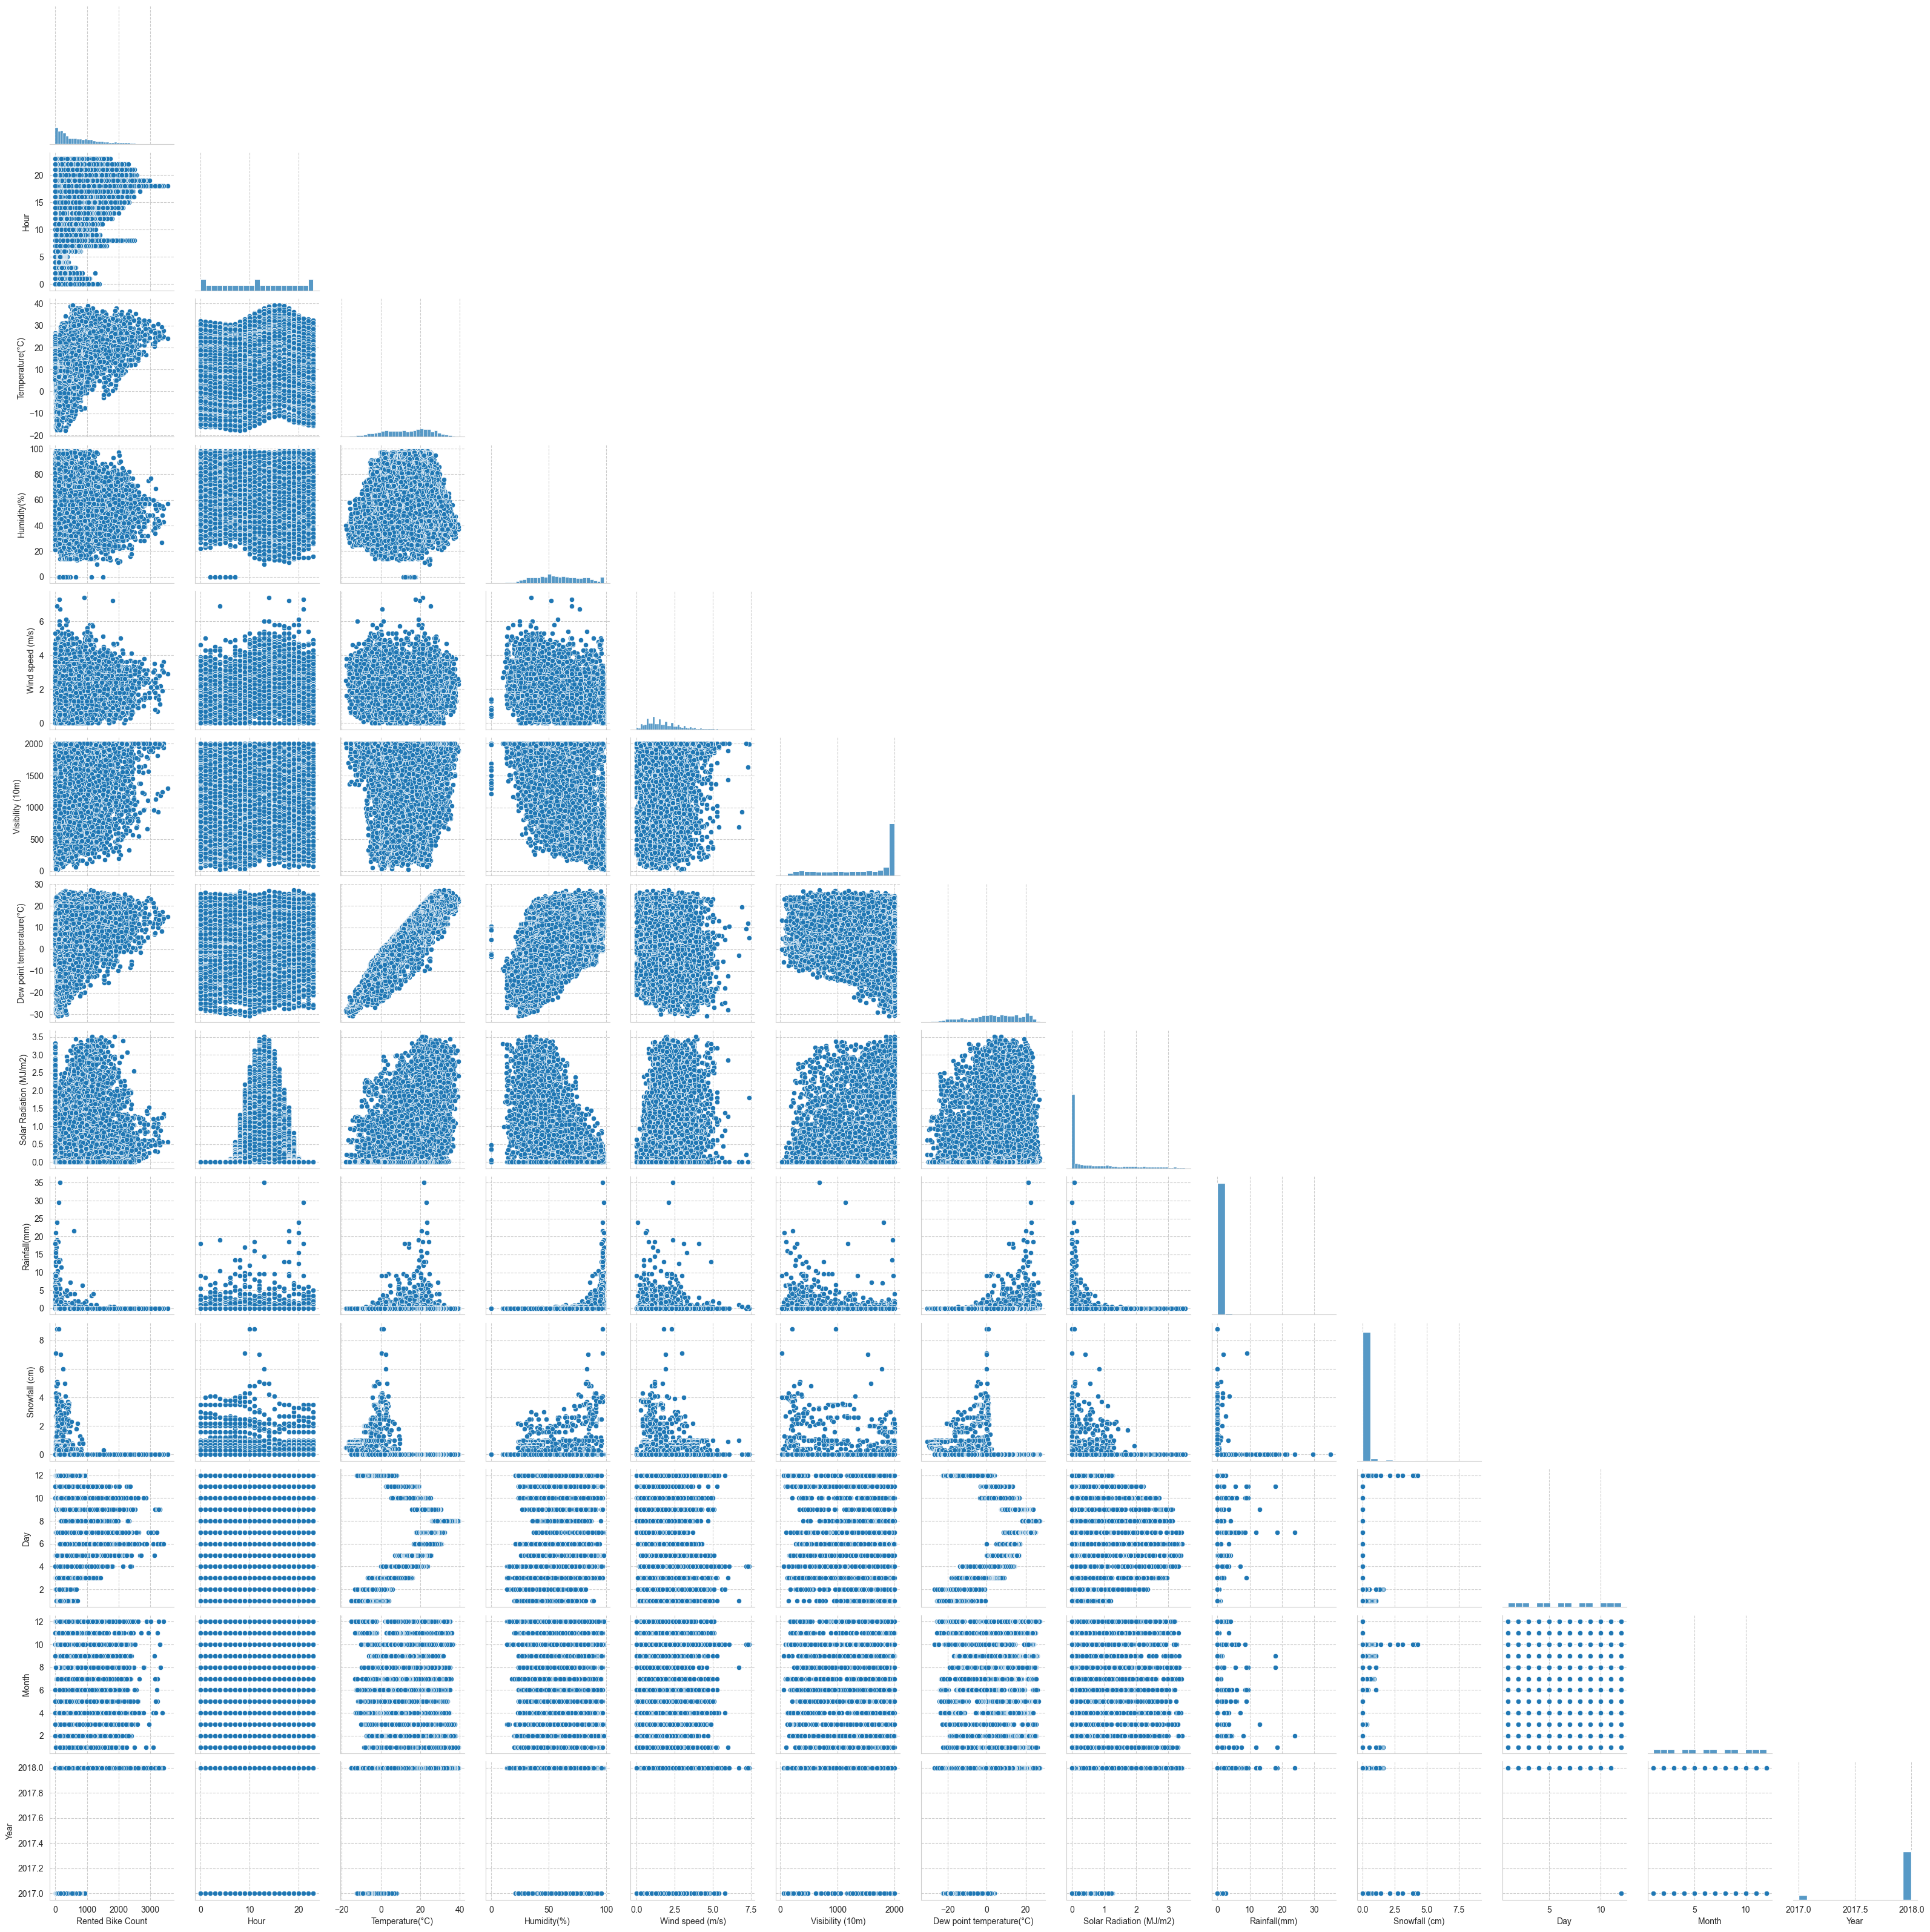

In [30]:
#ploting pairplot for more info
sns.pairplot(df, corner=True)

<Axes: xlabel='Month', ylabel='Rented Bike Count'>

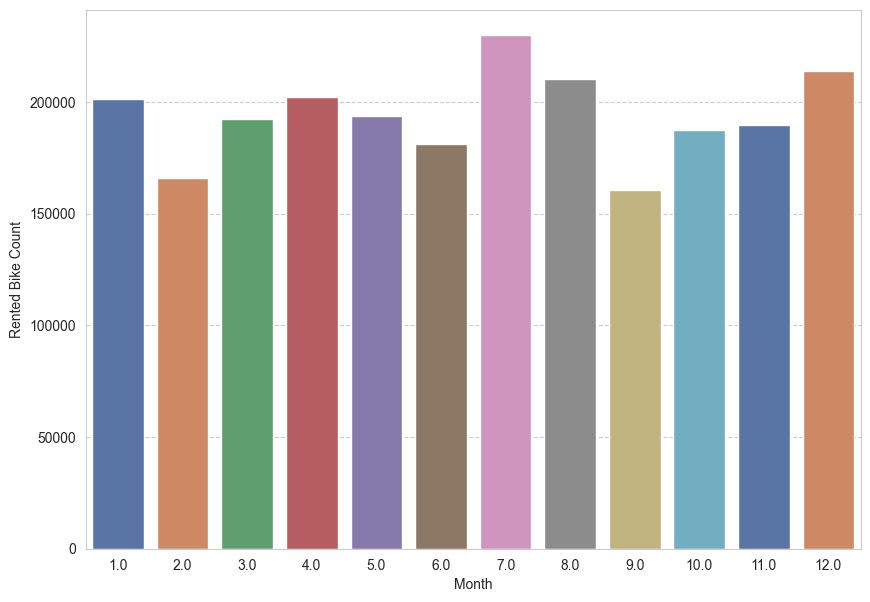

In [31]:
plt.figure(figsize=(10,7))
Month = df.groupby("Month").sum().reset_index()
sns.barplot(x="Month",y="Rented Bike Count",data=Month, palette="deep")

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

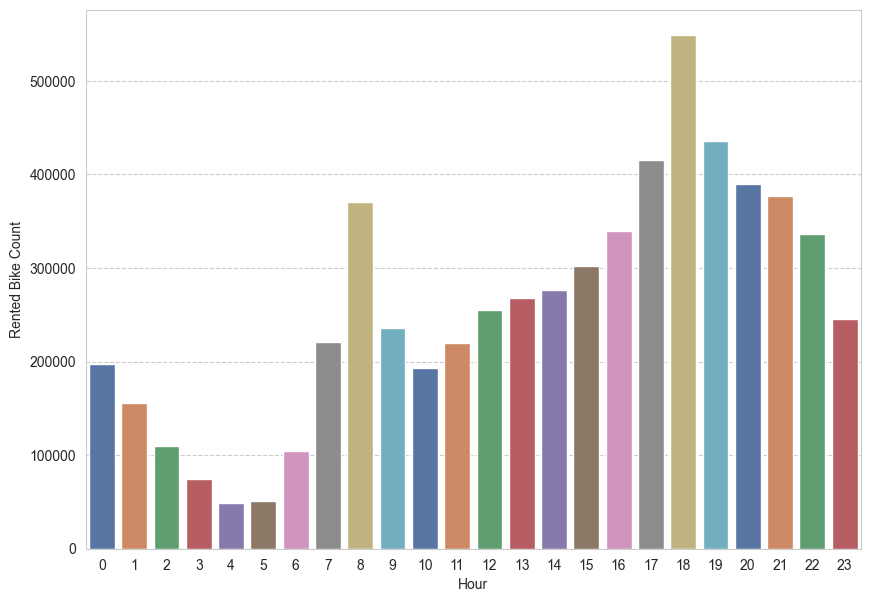

In [32]:
plt.figure(figsize=(10,7))
Month = df.groupby("Hour").sum().reset_index()
sns.barplot(x="Hour",y="Rented Bike Count",data=Month, palette="deep")

<Axes: xlabel='Weekday', ylabel='Rented Bike Count'>

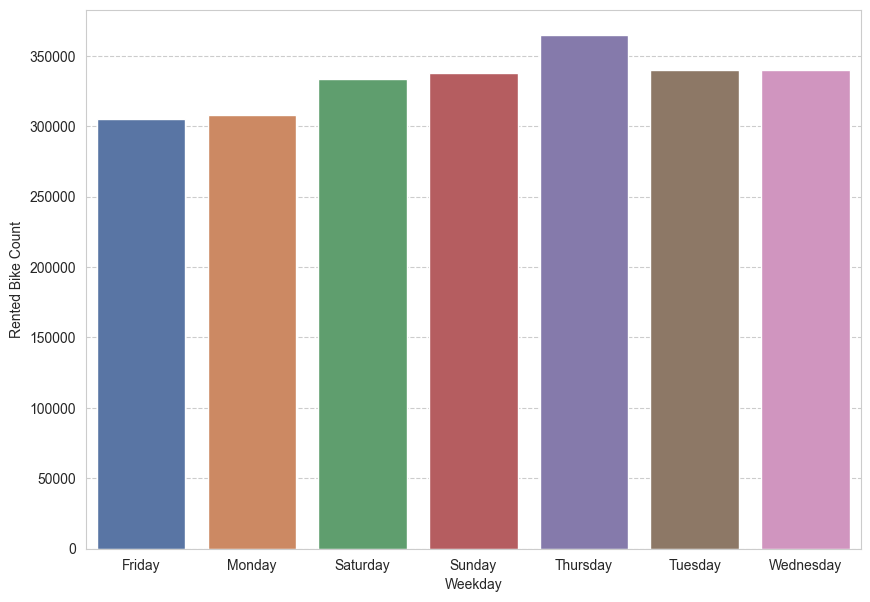

In [33]:
plt.figure(figsize=(10,7))
Month = df.groupby("Weekday").sum().reset_index()
sns.barplot(x="Weekday",y="Rented Bike Count",data=Month, palette="deep")

<Axes: xlabel='Holiday', ylabel='Rented Bike Count'>

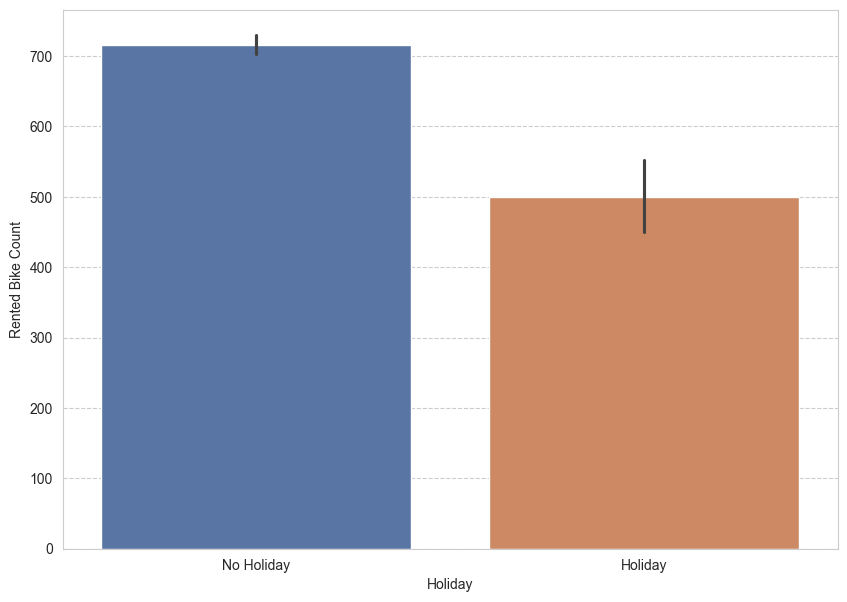

In [34]:
plt.figure(figsize=(10,7))
# Month = df.groupby("Weekday").sum().reset_index()
sns.barplot(x="Holiday",y="Rented Bike Count",data=df, palette="deep")

<Axes: xlabel='Seasons', ylabel='Rented Bike Count'>

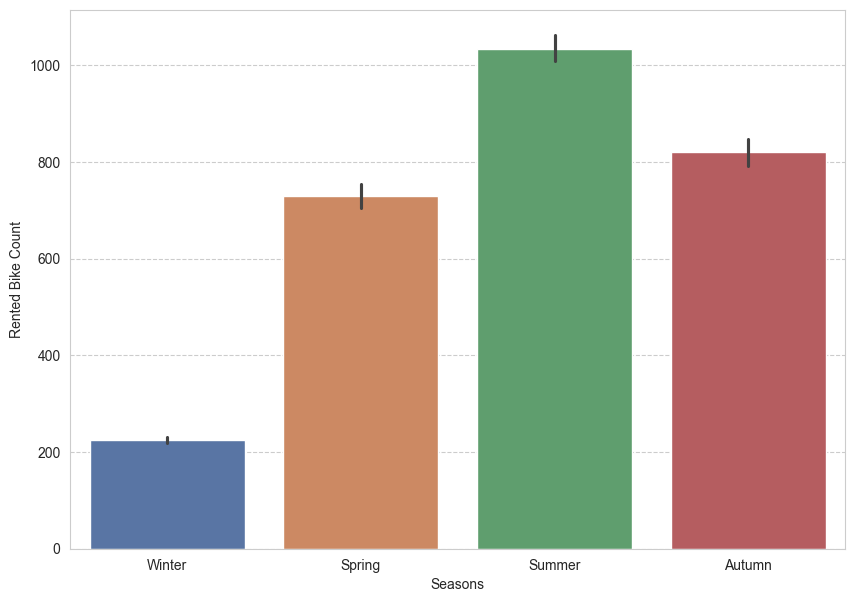

In [35]:
plt.figure(figsize=(10,7))
sns.barplot(x="Seasons",y="Rented Bike Count",data=df, palette="deep")

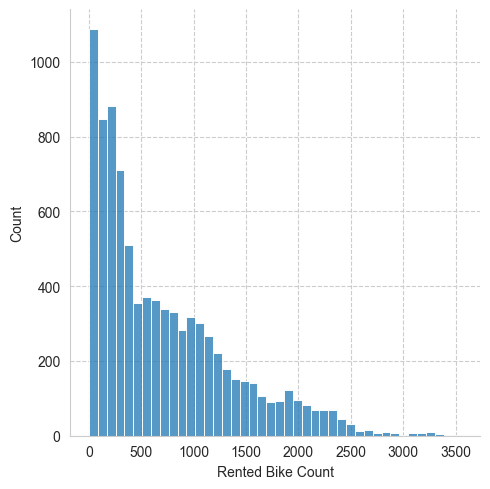

In [36]:
sns.displot(df["Rented Bike Count"])

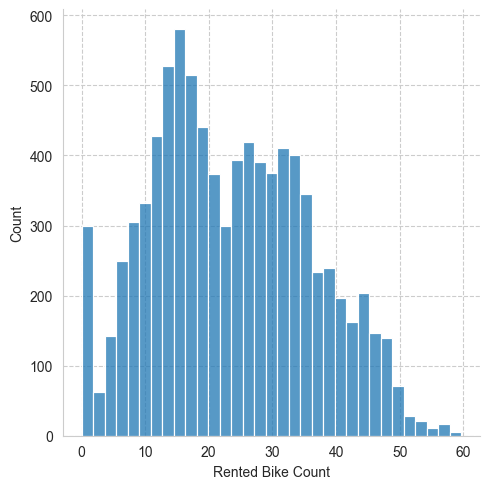

In [37]:
sns.displot(np.sqrt(df["Rented Bike Count"]))

In [38]:
# plt.figure(figsize=(40,7))
# sns.barplot(x="Rainfall(mm)",y="Rented Bike Count",data=df, palette="deep")

In [39]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Weekday,Day,Month,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,12.0,1.0,2017.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,12.0,1.0,2017.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,12.0,1.0,2017.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,12.0,1.0,2017.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,12.0,1.0,2017.0


## Skewed Data Only int and Float

In [40]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
numeric_columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Day',
       'Month', 'Year'],
      dtype='object')

In [41]:
skewness_results = df[numeric_columns].skew().sort_values(ascending=True)
skewness_results

Year                         -3.016423
Visibility (10m)             -0.701786
Dew point temperature(°C)    -0.367298
Temperature(°C)              -0.198326
Hour                          0.000000
Day                           0.000000
Month                         0.000000
Humidity(%)                   0.059579
Wind speed (m/s)              0.890955
Rented Bike Count             1.153428
Solar Radiation (MJ/m2)       1.504040
Snowfall (cm)                 8.440801
Rainfall(mm)                 14.533232
dtype: float64

## Correlation 

In [42]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
numeric_columns.corr()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Day,Month,Year
Rented Bike Count,1.000000,4.102573e-01,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,1.698170e-01,1.323543e-02,1.705648e-01
Hour,0.410257,1.000000e+00,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,2.803153e-16,4.921436e-17,3.203091e-14
Temperature(°C),0.538558,1.241145e-01,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,3.492136e-01,-6.226287e-02,3.445697e-01
Humidity(%),-0.199780,-2.416438e-01,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,1.903423e-01,-4.700400e-02,6.398335e-02
Wind speed (m/s),0.121108,2.851967e-01,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,-1.563865e-01,1.884229e-02,-1.470876e-02
Visibility (10m),0.199280,9.875348e-02,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,-7.502800e-03,2.705257e-02,8.337796e-03
Dew point temperature(°C),0.379788,3.054372e-03,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,3.721840e-01,-6.725069e-02,3.190757e-01
Solar Radiation (MJ/m2),0.261837,1.451309e-01,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,-5.032240e-03,-2.030977e-03,1.213104e-01
Rainfall(mm),-0.123074,8.714642e-03,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,4.878071e-02,-4.721603e-02,3.641922e-02
Snowfall (cm),-0.141804,-2.151645e-02,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,1.320241e-02,2.124676e-02,-2.004438e-01


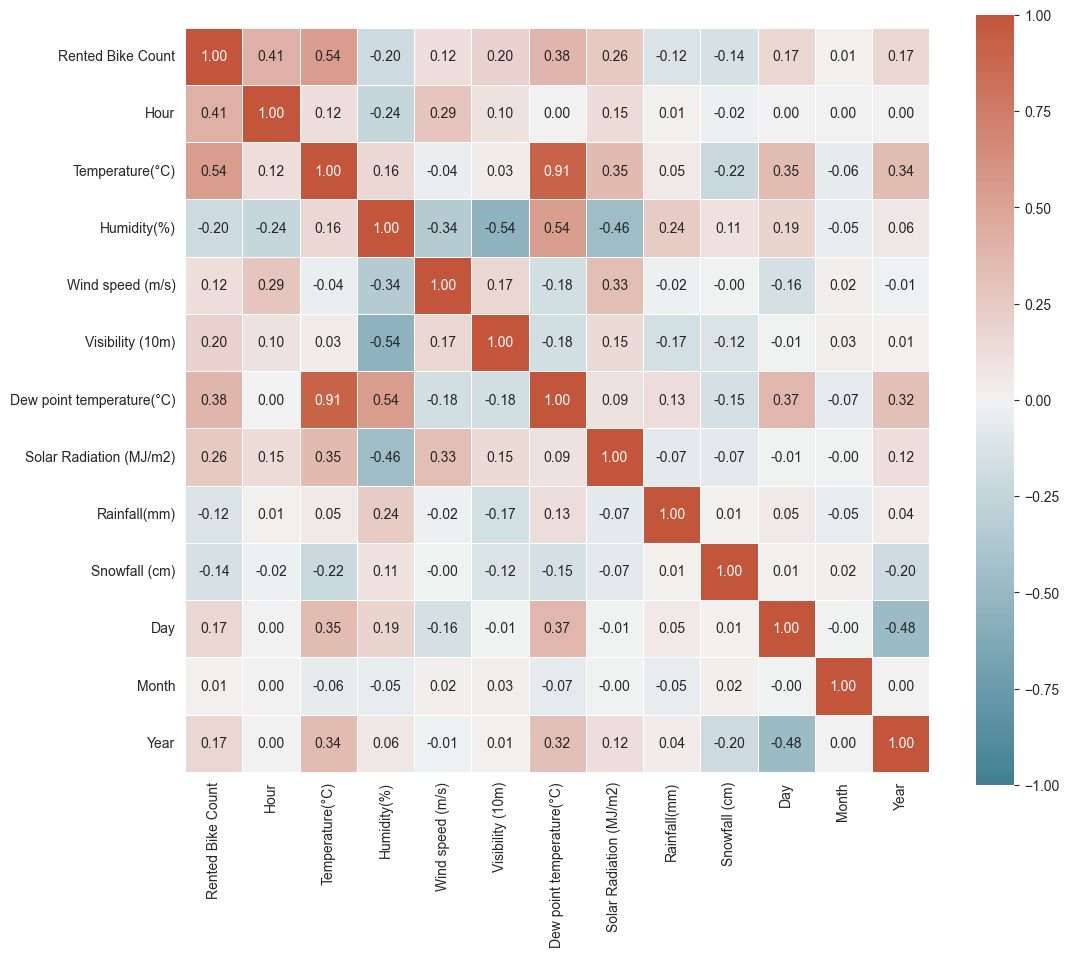

In [43]:
correlation_matrix = numeric_columns.corr()

# Set up a diverging color palette
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Create a heatmap with additional customization
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True,cmap=cmap, fmt=".2f", linewidths=.5, vmin=-1, vmax=1, square=True)
plt.show()


In [44]:
def get_vif(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [ variance_inflation_factor(df.values,i) for i in range (df.shape[1])]
    return vif



In [45]:
not_for_vif = ["Day","Month","Year","Rented Bike Count","Dew point temperature(°C)"]

get_vif(df[[i for i in df.describe().columns if i not in not_for_vif]])

,variables,VIF
0,Hour,3.921832
1,Temperature(°C),3.228318
2,Humidity(%),4.868221
3,Wind speed (m/s),4.608625
4,Visibility (10m),4.710170
5,Solar Radiation (MJ/m2),2.246791
6,Rainfall(mm),1.079158
7,Snowfall (cm),1.120579


In [46]:
df.drop(["Dew point temperature(°C)"],axis=1 , inplace=True)

## ENCODING

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   object 
 11  Functioning Day          8760 non-null   object 
 12  Weekday                  3456 non-null   object 
 13  Day                      3456 non-null   float64
 14  Month                   

In [48]:
cat_features = df.select_dtypes(include=['object'])

In [49]:
df["Holiday"].value_counts()

Holiday
No Holiday    8328
Holiday        432
Name: count, dtype: int64

In [50]:
df["Functioning Day"].value_counts()

Functioning Day
Yes    8465
No      295
Name: count, dtype: int64

In [51]:
df["Seasons"].value_counts()

Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: count, dtype: int64

In [52]:
df["Weekday"].value_counts()

Weekday
Sunday       552
Thursday     504
Tuesday      504
Wednesday    480
Monday       480
Saturday     480
Friday       456
Name: count, dtype: int64

In [53]:
df["Holiday"] = df["Holiday"].map({"No Holiday" : 0 , "Holiday" : 1})
df["Functioning Day"] = df["Functioning Day"].map({"No" : 0 , "Yes" : 1})

In [54]:
df_season = pd.get_dummies(df["Seasons"],drop_first = True)
df_weekday = pd.get_dummies(df["Weekday"],drop_first = True)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   int64  
 11  Functioning Day          8760 non-null   int64  
 12  Weekday                  3456 non-null   object 
 13  Day                      3456 non-null   float64
 14  Month                   

In [56]:
df = pd.concat([df,df_season,df_weekday],axis=1)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   int64  
 11  Functioning Day          8760 non-null   int64  
 12  Weekday                  3456 non-null   object 
 13  Day                      3456 non-null   float64
 14  Month                   

In [58]:
df.drop(["Seasons","Weekday"],axis=1 , inplace = True)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Holiday                  8760 non-null   int64  
 10  Functioning Day          8760 non-null   int64  
 11  Day                      3456 non-null   float64
 12  Month                    3456 non-null   float64
 13  Year                     3456 non-null   float64
 14  Spring                  

In [60]:
df['Day'] = df['Day'].replace([np.inf, -np.inf, np.nan], 0).astype(np.int64)
df['Month'] = df['Month'].replace([np.inf, -np.inf, np.nan], 0).astype(np.int64)
df['Year'] = df['Year'].replace([np.inf, -np.inf, np.nan], 0).astype(np.int64)

In [61]:
df[['Spring', 'Summer', 'Winter', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']] = df[['Spring', 'Summer', 'Winter', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']].astype('uint8')


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Holiday                  8760 non-null   int64  
 10  Functioning Day          8760 non-null   int64  
 11  Day                      8760 non-null   int64  
 12  Month                    8760 non-null   int64  
 13  Year                     8760 non-null   int64  
 14  Spring                  

In [63]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,...,Year,Spring,Summer,Winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,...,2017,0,0,1,0,0,0,1,0,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,...,2017,0,0,1,0,0,0,1,0,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,...,2017,0,0,1,0,0,0,1,0,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,...,2017,0,0,1,0,0,0,1,0,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,...,2017,0,0,1,0,0,0,1,0,0


In [107]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'Functioning Day', 'Day',
       'Month', 'Year', 'Spring', 'Summer', 'Winter', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [64]:
df.shape

(8760, 23)

## Split Data for Training & Testing

In [65]:
x = df.drop("Rented Bike Count",axis=1)
y = df["Rented Bike Count"]

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2023)

print("Shape of X_train : " , X_train.shape)
print("Shape of y_train : " , y_train.shape)
print("Shape of X_test : " , X_test.shape)
print("Shape of y_test : " , y_test.shape)

Shape of X_train :  (7008, 22)
Shape of y_train :  (7008,)
Shape of X_test :  (1752, 22)
Shape of y_test :  (1752,)


## Scaling lec7

In [66]:
sc = StandardScaler()
sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [67]:
X_train[:2]

array([[ 1.51118219,  0.05556521, -2.10940521,  0.46658045,  0.92262892,
        -0.65681529, -0.12916836, -0.17535463, -0.22754885,  0.18254726,
         0.3698698 ,  2.44014746,  1.2340516 ,  1.74132735, -0.58152447,
        -0.57866842, -0.24538093, -0.24242567, -0.25819889, -0.24766057,
         4.12497566, -0.24439892],
       [ 0.93371229,  1.00382241, -0.25185689,  1.82005277,  0.92262892,
         0.82386154, -0.12916836, -0.17535463, -0.22754885,  0.18254726,
         0.88911009,  2.44014746,  1.2340516 , -0.57427456,  1.71961809,
        -0.57866842, -0.24538093, -0.24242567, -0.25819889,  4.0377845 ,
        -0.24242567, -0.24439892]])

In [68]:
sc.mean_

array([1.15323916e+01, 1.28319920e+01, 5.81522546e+01, 1.71738014e+00,
       1.44041795e+03, 5.67796804e-01, 1.52539954e-01, 7.52283105e-02,
       4.92294521e-02, 9.67751142e-01, 2.57534247e+00, 2.58133562e+00,
       7.99910959e+02, 2.48002283e-01, 2.52711187e-01, 2.50856164e-01,
       5.67922374e-02, 5.55079909e-02, 6.25000000e-02, 5.77910959e-02,
       5.55079909e-02, 5.63641553e-02])

In [69]:
sc.scale_

array([6.92676802e+00, 1.20220548e+01, 2.04570722e+01, 1.03437653e+00,
       6.06508248e+02, 8.64469525e-01, 1.18093896e+00, 4.29006703e-01,
       2.16346743e-01, 1.76660323e-01, 3.85178121e+00, 3.85987508e+00,
       9.87064917e+02, 4.31853159e-01, 4.34566730e-01, 4.33505881e-01,
       2.31445197e-01, 2.28969111e-01, 2.42061459e-01, 2.33347991e-01,
       2.28969111e-01, 2.30623583e-01])

## Training ML Model lec8

## Linear Regression Model

In [70]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [71]:
y_pred = lr.predict(X_test)

In [72]:
y_pred

array([  65.63725383, 1001.04373137, 1423.77103019, ..., 1526.88486901,
        524.61696505,  813.17678643])

## Model Evaluation

In [73]:
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)

print(f"MSE : {MSE}")
print(f"RMSE : {RMSE}")
print(f"MAE : {MAE}")
print(f"R2 : {R2}")

MSE : 189178.5028693621
RMSE : 434.94655173867295
MAE : 330.42878433990296
R2 : 0.5365315229929598


In [74]:
def get_metrics(y_true, y_pred, model_name):
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    MAE = mean_absolute_error(y_test, y_pred)
    R2 = r2_score(y_test, y_pred)

    print(f"{model_name} : ['MSE' : {round(MSE,3)}, 'RMSE' : {round(RMSE,3)}, 'MAE':{round(MAE,3)}, 'R2' : {round(R2,3)}]")



In [75]:
get_metrics(y_test,y_pred,"LinearRegression")

LinearRegression : ['MSE' : 189178.503, 'RMSE' : 434.947, 'MAE':330.429, 'R2' : 0.537]


## Train Multiple Models 
## To Select Best Model

In [76]:
rir = Ridge().fit(X_train,y_train)
y_pred_rir = rir.predict(X_test)

lar = Lasso().fit(X_train,y_train)
y_pred_lar = lar.predict(X_test)

poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
poly_r = LinearRegression().fit(X_train_poly,y_train)
y_pred_poly = poly_r.predict(X_test_poly)

svr = SVR().fit(X_train,y_train)
y_pred_svr = svr.predict(X_test)

knnr = KNeighborsRegressor().fit(X_train,y_train)
y_pred_knnr = knnr.predict(X_test)

dtr = DecisionTreeRegressor().fit(X_train,y_train)
y_pred_dtr = dtr.predict(X_test)

rfr = RandomForestRegressor().fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)

xgbr = XGBRegressor().fit(X_train,y_train)
y_pred_xgbr = xgbr.predict(X_test)


In [77]:
get_metrics(y_test,y_pred_rir,"Ridge")
get_metrics(y_test,y_pred_lar,"Lasso")
get_metrics(y_test,y_pred_poly,"PolynomialFeatures")
get_metrics(y_test,y_pred_svr,"SVR")
get_metrics(y_test,y_pred_knnr,"KNeighborsRegressor")
get_metrics(y_test,y_pred_dtr,"DecisionTreeRegressor")
get_metrics(y_test,y_pred_rfr,"RandomForestRegressor")
get_metrics(y_test,y_pred_xgbr,"XGBRegressor")


Ridge : ['MSE' : 189179.081, 'RMSE' : 434.947, 'MAE':330.425, 'R2' : 0.537]
Lasso : ['MSE' : 189201.891, 'RMSE' : 434.973, 'MAE':330.262, 'R2' : 0.536]
PolynomialFeatures : ['MSE' : 124434.793, 'RMSE' : 352.753, 'MAE':249.651, 'R2' : 0.695]
SVR : ['MSE' : 324657.162, 'RMSE' : 569.787, 'MAE':388.149, 'R2' : 0.205]
KNeighborsRegressor : ['MSE' : 100573.507, 'RMSE' : 317.133, 'MAE':204.564, 'R2' : 0.754]
DecisionTreeRegressor : ['MSE' : 112447.807, 'RMSE' : 335.332, 'MAE':187.172, 'R2' : 0.725]
RandomForestRegressor : ['MSE' : 51772.159, 'RMSE' : 227.535, 'MAE':137.909, 'R2' : 0.873]
XGBRegressor : ['MSE' : 49946.135, 'RMSE' : 223.486, 'MAE':139.199, 'R2' : 0.878]


## Visualise Model Prediciton

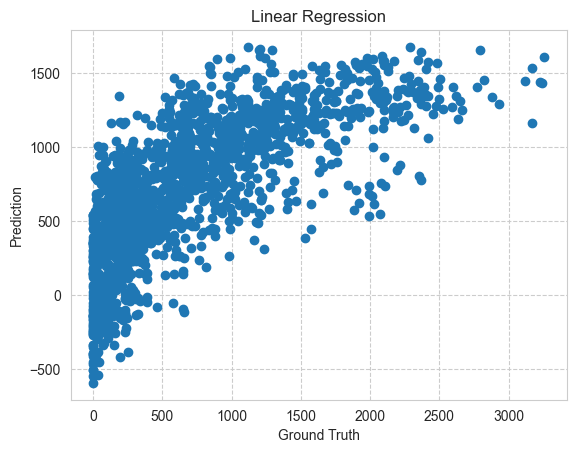

In [78]:
plt.scatter(y_test,y_pred)
plt.title("Linear Regression")
plt.xlabel("Ground Truth")
plt.ylabel("Prediction")
plt.show()

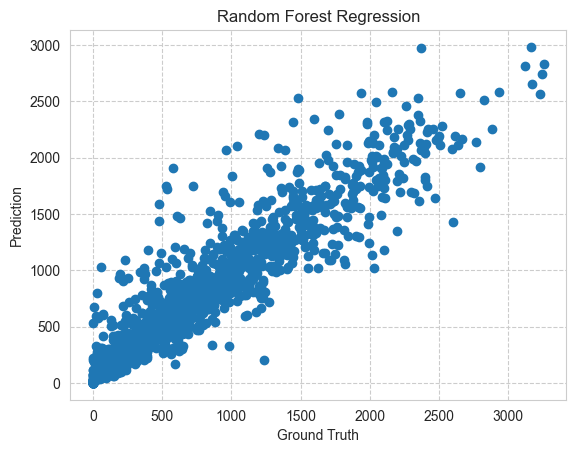

In [79]:
plt.scatter(y_test,y_pred_rfr)
plt.title("Random Forest Regression")
plt.xlabel("Ground Truth")
plt.ylabel("Prediction")
plt.show()

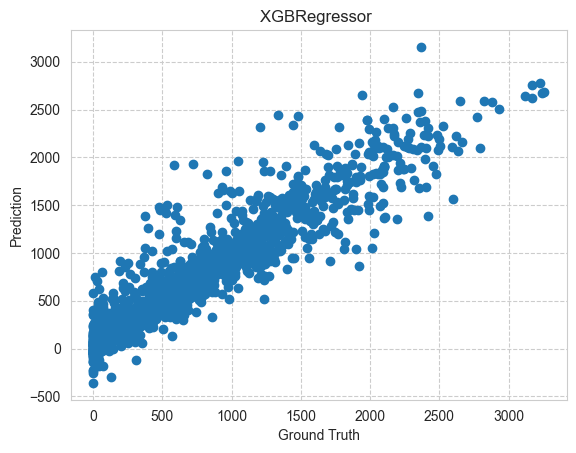

In [80]:
plt.scatter(y_test,y_pred_xgbr)
plt.title("XGBRegressor ")
plt.xlabel("Ground Truth")
plt.ylabel("Prediction")
plt.show()

## Hyperparameter Tuning for Random Forest Regressor

In [81]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto','sqrt']

max_depth = [int(x) for x in np.linspace(10,120,num = 12)] 

min_samples_split = [2,5,10]

min_samples_leaf = [1,2,4]

bootstrap = [True,False]

random_grid = {'n_estimators':n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [82]:
import time
from sklearn.model_selection import RandomizedSearchCV

In [83]:
start_time = time.time()

In [84]:
rf = RandomForestRegressor()

In [85]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,n_iter = 100,cv=3,verbose=2,random_state=42,n_jobs=-1)

In [86]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [87]:
y_pred_rf_random = rf_random.predict(X_test)

In [88]:
print("Time taken to training using randomize search :",time.time()-start_time)

Time taken to training using randomize search : 381.69669103622437


In [89]:
get_metrics(y_test,y_pred_rf_random,"RandomForestRegressor Fine Tuning")

RandomForestRegressor Fine Tuning : ['MSE' : 50055.733, 'RMSE' : 223.731, 'MAE':141.782, 'R2' : 0.877]


In [90]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 120,
 'bootstrap': False}

In [91]:
rf_tuned = RandomForestRegressor(n_estimators = 400,
 min_samples_split = 2,
 min_samples_leaf = 1,
 max_features = 'sqrt',
 max_depth = 120,
 bootstrap = False)


In [92]:
rf_tuned.fit(X_train,y_train)
y_pred_rf_tuned = rf_tuned.predict(X_test)

get_metrics(y_test,y_pred_rf_tuned,"RandomForestRegrssor With Best Parameter")

RandomForestRegrssor With Best Parameter : ['MSE' : 50322.911, 'RMSE' : 224.328, 'MAE':141.86, 'R2' : 0.877]


 ## Hyper parameter for XG Boost Regressor lec12

In [93]:
import time
from sklearn.model_selection import RandomizedSearchCV

In [94]:
start_time = time.time()

In [95]:
params = {
    'max_depth': [3, 5, 6, 10, 15, 20],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': np.arange(0.5, 1.0, 0.1),  
    'colsample_bytree': np.arange(0.4, 1.0, 0.1),
    'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
    'n_estimators': [100, 500, 1000]
}


In [101]:
xgbr = XGBRegressor(seed=20)
rscv = RandomizedSearchCV(estimator=xgbr,
                            param_distributions=params,
                            scoring='neg_mean_squared_error',
                            n_iter=25,
                            cv=5,
                            verbose=1)
rscv.fit(X_train,y_train)

y_pred_xgb_random = rscv.predict(X_test)

get_metrics(y_test,y_pred_xgb_random,"XGBRegressor With Best Parameter")

print("Time taken to training using ranodmize search :" , time.time()-start_time)

print("Best Parameter : " , rscv.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
XGBRegressor With Best Parameter : ['MSE' : 47129.727, 'RMSE' : 217.094, 'MAE':133.105, 'R2' : 0.885]
Time taken to training using ranodmize search : 993.5379512310028
Best Parameter :  {'subsample': 0.6, 'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.6}


## Save ML Best Model 

In [100]:
import os
import pickle

dir = r"C:\DS\Seoul-Bike-Sharing-Demand-Prediction-main\Models"
model_file_name = "xgboost_regressor_r2_0_928_v1.pkl"

model_file_path = os.path.join(dir,model_file_name)
# model_file_path

pickle.dump(xgbr,open(model_file_path,"wb")) 

In [101]:
X_test[0,:]

array([ 1.07807977,  0.22192612,  0.77468297,  1.82005277, -1.26200749,
       -0.25194272, -0.12916836, -0.17535463, -0.22754885, -5.47803337,
        0.62948994,  1.92199598,  1.2340516 ,  1.74132735, -0.58152447,
       -0.57866842, -0.24538093, -0.24242567, -0.25819889, -0.24766057,
       -0.24242567, -0.24439892])

In [102]:
y_test

3859       0
5647    1213
6735    1391
374      292
5791    1130
        ... 
1992     195
930      316
5634    2405
3291     164
6416     721
Name: Rented Bike Count, Length: 1752, dtype: int64

## Dump Scaling Parameter

In [105]:
sc_dump_path = r"C:\DS\Seoul-Bike-Sharing-Demand-Prediction-main\Models\sc.pkl"

pickle.dump(sc,open(sc_dump_path, "wb"))

In [ ]:
# checking Outliers with seaborn boxplot
n = 1
plt.figure(figsize=(20,15))

for i in numeric_features.columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.boxplot(df[i])
  plt.title(i)
  plt.tight_layout()

We don't think of worry about outliers in this data 

##<b> Explore our categorical feature and Trying to take some important information from the categorical feature

In [ ]:
# we create point plots with Rented Bike Count during different categorical features with respect of Hour
for i in categorical_features.columns:
  if i == 'Hour':
    pass
  else:
    plt.figure(figsize=(20,10))
    sns.pointplot(x=df["Hour"],y=df['Rented Bike Count'],hue=df[i])
    plt.title(f"Rented Bike Count during different {i} with respect of Hour")
  plt.show()

##<b> Observation 
From all these pointplot we have observed a lot from every column like :

## Season 
In the season column, we are able to understand that the demand is low in the winter season.

## Holiday
In the Holiday column, The demand is low during holidays, but in no holidays the demand is high, it may be because people use bikes to go to their work.

## Functioning Day
In the Functioning Day column, If there is no Functioning Day then there is no demand

## Days of week
In the Days of week column, We can observe from this column that the pattern of weekdays and weekends is different, in the weekend the demand becomes high in the afternoon. While the demand for office timings is high during weekdays, **we can further change this column to weekdays and weekends.**

## month 
In the month column, We can clearly see that the demand is low in December January & Febuary, It is cold in these months and we have already seen in season column that demand is less in winters.

## year
The demand was less in 2017 and higher in 2018, it may be because it was new in 2017 and people did not know much about it.

#<b> Some more experiments for our categorical features 

In [ ]:
# Converting days of weeks in Two variable from Monaday to Friday in Weekdays and Saturday and Sunday to Weekend
df['week'] = df['day_of_week'].apply(lambda x:'Weekend'  if x=='Saturday' or  x== 'Sunday' else 'Weekdays')

In [ ]:
# value counts of Week column
df.week.value_counts()

In [ ]:
# Getting feel of week column with pointplot  
plt.figure(figsize=(15,7))
sns.pointplot(x=df["Hour"],y=df['Rented Bike Count'],hue=df['week'])
plt.title("Rented Bike Count during weekday and weekend with respect of Hour")

## Now we can clearly see the pattern which shows that the demand is high in the afternoon on the weekend. While there is more demand during office hours in weekdays

## Now we can drop the days of week column

In [ ]:
# droping the days of week column from df and from categorical feature 
df.drop(columns=['day_of_week'], inplace=True)
categorical_features.drop(columns=['day_of_week'], inplace=True)

## Lets do some feature engineering on Hour column

In [ ]:
# defining a function for distribute hour column
def hour(h):
  if h >= 17 and h <= 22:
    return 'Evening'
  elif h >= 7 and h <= 10:
    return 'Morning'
  elif h >= 11 and h <= 16:
    return 'Noon'
  else :
    return 'Night'     

In [ ]:
# apply the hour function
df['Hour'] = df['Hour'].apply(hour)

In [ ]:
# value count of Hour 
df['Hour'].value_counts()

##<b> value Counts in percentage 

In [ ]:
for i in categorical_features.columns:
  print('feature name : ',i)
  print(df[i].value_counts(normalize=True))
  print('\n')

##<b> lets take a visualization of value counts 

In [ ]:
# creating boxplot plot and bar plot
n=1
for i in categorical_features.columns:
  plt.figure(figsize=(15,15))
  plt.subplot(6,2,n)
  n+=1
  print('\n')
  print('='*70,i,'='*70)
  print('\n')
  sns.boxplot(x=df[i],y=df["Rented Bike Count"])
  plt.subplot(6,2,n)
  n+= 1
  sns.barplot(df[i],df['Rented Bike Count'])
  plt.tight_layout()
  plt.show()

In [ ]:
# creating boxplot for all categorical feature
n=1
plt.figure(figsize=(20,15))
for i in categorical_features.columns:
  plt.subplot(3,3,n)
  n=n+1
  plt.pie(df[i].value_counts(),labels = df[i].value_counts().keys().tolist(),autopct='%.0f%%')
  plt.title(i)
  plt.tight_layout()

##<b> Now the time of Explore our numerical feature and Trying to take some important information from the Numeical feature

##<b> Pays little attention to the skewness of our numerical features

# In this plots we observe that some of our columns is right skewed and some are left skewed we have to remember this things when we apply algorithms

## Right skewed columns are
Rented Bike Count (Its also our Dependent variable), 
Wind speed (m/s),
Solar Radiation (MJ/m2),
Rainfall(mm),
Snowfall (cm),

## Left skewed columns are
Visibility (10m), 
Dew point temperature(°C)


##<b> Let's try something else to get information from our Numerical features

In [ ]:
#plotting histogram with mean and median, and distplot of all the numeric features of the dataset
n=1
for i in numeric_features.columns:
  plt.figure(figsize=(20,40))
  plt.subplot(9,2,n)
  n+=1
  print('\n')
  print('='*70,i,'='*70)
  print('\n')
  # fig=plt.figure()
  # ax=fig.gca()
  feature=df[i]
  feature.hist(bins=50,)
  plt.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2) 
  plt.subplot(9,2,n)
  n+= 1
  sns.distplot(df[i])
  # plt.tight_layout()
  plt.show()


# In Distplot plots we observe that some of our columns is right skewed and some are left skewed we have to remember this things when we apply algorithms

## Right skewed columns are
Rented Bike Count (Its also our Dependent variable), 
Wind speed (m/s),
Solar Radiation (MJ/m2),
Rainfall(mm),
Snowfall (cm),

## Left skewed columns are
Visibility (10m), 
Dew point temperature(°C)

## From Histogram we are coming to know that the features which are skewed, their mean and the median are also skewed, which was understood by looking at the graph that this would happen.

##<b> Lets try to find how is the relation of numerical features with our dependent variable

In [ ]:
# Regression plot to know relation with our independent variable
n=1
plt.figure(figsize=(15,15))
for i in numeric_features.columns:
  if i == 'Rented Bike Count':
    pass
  else:
    plt.subplot(4,2,n)
    n+=1
    sns.regplot(df[i], df['Rented Bike Count'],scatter_kws={"color": "cyan"}, line_kws={"color": "red"})
    plt.title(f'Dependend variable and {i}')
    plt.tight_layout()

## This regression plots shows that some of our features are positive linear and some are negative linear in relation to our target variable.

## <b> Now is the time to know what is the correlation of our dependent variable with the independent features

In [ ]:
# Correlation with Rented Bike Count
df.corr()['Rented Bike Count']

## As we saw in the regression plot that some features are negatively correlated and some positive, we are seeing the same thing here as well.

##<b> Let us see the correlation of all the numerical features with the heat map, so that we will also get to know the multilinearity.

In [ ]:
# using seaborn heatmap for ploting correlation graph 
plt.figure(figsize=(10,8))
sns.heatmap(abs(df.corr()), cmap='coolwarm', annot=True)

## From this graph we are able to see that there is multicollinearity in temperature(°C) and dev point temperature(°C) column.

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)']]])

In [ ]:
new_df=pd.get_dummies(df,drop_first=True,sparse=True)

In [ ]:
new_df.head(2)

##<b> We saw that our dependent variable is right skewed, it needs to be normalized.
##We do some experiments to normalize it

In [ ]:
fig,axes = plt.subplots(1,3,figsize=(20,5))
# here we use log10 
sns.distplot(np.log10(new_df['Rented Bike Count']+0.0000001),ax=axes[0],color='red').set_title("log 10")
# here we use square 
sns.distplot((new_df['Rented Bike Count']**2),ax=axes[1],color='red').set_title("square")
# here we use square root 
sns.distplot(np.sqrt(new_df['Rented Bike Count']),ax=axes[2], color='green').set_title("Square root")

## Our data in green plot is normalized to some extent: so we will go with square root on our dependent variable

## Divide data in dependent feature and Independent feature

In [ ]:
X = new_df.drop(columns=['Rented Bike Count','Dew point temperature(°C)'])
y = np.sqrt(new_df['Rented Bike Count'])

In [ ]:
# Train test split our data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=42)

## Geting Feel of my X_train, X_test, y_train, y_test

In [ ]:
X_train.head()

In [ ]:
X_test.head()

In [ ]:
y_train.head()

In [ ]:
y_test.head()

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

##<b>Defining a function to train and evaluate the model with Diffrent parameters like MSE , RMSE, R2 Score, Best_params, Best score, Coefficient , intercept and feature importance  

In [ ]:
# Appending all models parameters to the corrosponding list
mean_absolut_error = []
mean_sq_error=[]
root_mean_sq_error=[]
training_score =[]
r2_list=[]
adj_r2_list=[]
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


def score_metrix (model,X_train,X_test,Y_train,Y_test):

  '''
    train the model and gives mae, mse,rmse,r2,adj r2 score of the model
    
  '''
  #training the model
  model.fit(X_train,Y_train)

  # Training Score
  training  = model.score(X_train,Y_train)
  print("Training score  =", training)

  try:
      # finding the best parameters of the model if any 
    print(f"The best parameters found out to be :{model.best_params_} \nwhere model best score is:  {model.best_score_} \n")
  except:
    pass
    

  #predicting the Test set and evaluting the models 

  if model == LinearRegression() or model == Lasso() or model == Ridge():
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test**2,Y_pred**2)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test**2,Y_pred**2)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score
    
    r2 = r2_score(Y_test**2,Y_pred**2)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test**2,Y_pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')
  
  else:
    # for tree base models
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test,Y_pred)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test,Y_pred)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score
    
    r2 = r2_score(Y_test,Y_pred)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test,Y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')

    try:
      
      # ploting the graph of feature importance
      
      best = model.best_estimator_
      features = X_train.columns
      importances = best.feature_importances_
      indices = np.argsort(importances)
      plt.figure(figsize=(10,15))
      plt.title('Feature Importance')
      plt.barh(range(len(indices)), importances[indices], color='red', align='center')
      plt.yticks(range(len(indices)), [features[i] for i in indices])
      plt.xlabel('Relative Importance')
      plt.show()
    
    except:
      pass
  
  # Here we appending the parameters for all models 
  mean_absolut_error.append(MAE)
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  training_score.append(training)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)

  print('*'*80)
  # print the cofficient and intercept of which model have these parameters and else we just pass them
  try :
    print("coefficient \n",model.coef_)
    print('\n')
    print("Intercept  = " ,model.intercept_)
  except:
    pass
  print('\n')
  print('*'*20, 'ploting the graph of Actual and predicted only with 80 observation', '*'*20)

  # ploting the graph of Actual and predicted only with 80 observation for better visualisation which model have these parameters and else we just pass them
  try:
    # ploting the line graph of actual and predicted values  
    plt.figure(figsize=(15,7))
    plt.plot((Y_pred)[:80])
    plt.plot((np.array(Y_test)[:80]))
    plt.legend(["Predicted","Actual"])
    plt.show()
  except:
    pass



## transforming X_train and X_test with yeo-johnson transformation




In [ ]:
from sklearn.preprocessing import PowerTransformer,MinMaxScaler
yeo = PowerTransformer()
X_train_trans = yeo.fit_transform(X_train) # fit transform the training set
X_test_trans = yeo.transform(X_test) #tranform the test set

#<b> Linear Regression

In [ ]:
# imporing linear models
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [ ]:
# importing Fitting the linear regression model with our score matrix function 
score_metrix(LinearRegression(),X_train_trans,X_test_trans,y_train,y_test)

##<b> Regularization

# Lasso with hyperparameter tuning

In [ ]:
# importing Lasso from sklearn
from sklearn.linear_model import Lasso

In [ ]:
L1 = Lasso() #creating variable
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]} #lasso parameters 
lasso_cv = GridSearchCV(L1, parameters, cv=5) #using gridsearchcv and cross validate the model


In [ ]:
# fit and evaluate model with score_matrix function
score_metrix(lasso_cv,X_train_trans,X_test_trans,y_train,y_test)

## Ridge with hyperparameter tuning

In [ ]:
# # importing Lasso from sklearn
from sklearn.linear_model import Ridge

In [ ]:
L2 = Ridge() #creating variable
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]} # giving parameters 
L2_cv = GridSearchCV(L2, parameters, scoring='r2', cv=5) #using gridsearchcv and cross validate the model
score_metrix(L2_cv,X_train_trans,X_test_trans,y_train,y_test) # fit and evaluate model with score_matrix function

## Polynomial 

In [ ]:
# importing polynominal features from sklearn
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(2) #creating variable with degree 2
poly_X_train = poly.fit_transform(X_train_trans) # fit the train set
poly_X_test = poly.transform(X_test_trans) #transform the test set

In [ ]:
# fit and evaluate model with score_matrix function
score_metrix(LinearRegression(), poly_X_train,poly_X_test,y_train,y_test)

##<b> Train Test split for Tree Base Models
<b> because multicollinearty not effect tree base models

In [ ]:
# Split data in X and Y
new_X = new_df.drop(columns='Rented Bike Count')
new_y = new_df['Rented Bike Count']

In [ ]:
# Train test split our data
X_train,X_test,y_train,y_test = train_test_split(new_X,new_y, test_size=0.25,random_state=42)

In [ ]:
# Scalling data with yeo-johnson
scaler = PowerTransformer()

In [ ]:
X_train  = scaler.fit_transform(X_train) #fitting the X_train
X_test  = scaler.transform(X_test) # transform test set

# <b> Decission Tree 
### Using Grid Search CV for hyperparameter tuning and try to find best parameters

In [ ]:
# imporing DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Parameters for Decission Tree model
param_grid = {'criterion' : ["mse"],
              'splitter' : ["best", "random"],
              'max_depth' : [10,15,20,'none'],
              'min_samples_split': [10,50,100],
              'max_features' :[24,35,40,49]}

In [ ]:
# Using Grid Search 
Dt_grid_search = GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid,cv=2,n_jobs=-1)

In [ ]:
# fit and evaluate model with score_matrix function
score_metrix(Dt_grid_search,X_train,X_test,y_train,y_test)

#<b> RandomForest Regression

In [ ]:
# Importing Randomfroest from sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# parameters for Random forest
param_grid = {"n_estimators":[50,100,150],
              'max_depth' : [10,15,20,25,'none'],
              'min_samples_split': [10,50,100],
              'max_features' :[24,35,40,49]}

In [ ]:
# Using Grid SearchCV 
Ranom_forest_Grid_search = GridSearchCV(RandomForestRegressor(),param_grid=param_grid,n_jobs=-1,verbose=2)

In [ ]:
# fit and evaluate model with score_matrix function
score_metrix(Ranom_forest_Grid_search,X_train,X_test,y_train,y_test)

#<b> Bagging

In [ ]:
# Importing Bagging from sklearn.ensemble
from sklearn.ensemble import BaggingRegressor

In [ ]:
# parameters for Bagging
param_grid = {"n_estimators":[50,100,150],
              "bootstrap":["False","True"],
              'max_depth' : [10,15,20,'none'],
              'min_samples_split': [10,50,100],
              'max_features' :[24,35,40]}

In [ ]:
# Using Grid SearchCV 
Bagging_Grid_search = GridSearchCV(RandomForestRegressor(),param_grid=param_grid,n_jobs=-1,verbose=2)

In [ ]:
# fit and evaluate model with score_matrix function
score_metrix(Bagging_Grid_search,X_train,X_test,y_train,y_test)

#<b> Gradient Boosting Regressor

In [ ]:
# Importing Gradient Boosting Regressor from sklearn.ensemble
from sklearn.ensemble import GradientBoostingRegressor 

In [ ]:
# parameters for Gradient Boosting Regressor
param_grid = {'learning_rate':[0.15,0.1,0.05,0.02,0.20],
              'n_estimators':[100,150,200,250],
              'max_depth':[2,4,6,10]}

In [ ]:
# Using grid search 
gradient_boost_grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid=param_grid, n_jobs=-1, verbose=2)

In [ ]:
# fit and evaluate model with score_matrix function
score_metrix(gradient_boost_grid_search,X_train,X_test,y_train,y_test)

#<b> Adaboost Boost Regressor

In [ ]:
# Importing Ada Boost Regressor from sklearn.ensemble
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
# parameters for Ada Boost Regressor
param_grid = {'n_estimators': [50,100,150,200],
          'learning_rate':[0.5,1,1.5,2],
          'base_estimator': [LinearRegression(),DecisionTreeRegressor()]}

In [ ]:
#creating Ada boost grid model
Ada_boost_grid_search = GridSearchCV(AdaBoostRegressor(),param_grid=param_grid,n_jobs=-1)

In [ ]:
# fit and evaluate model with score_matrix function
score_metrix(Ada_boost_grid_search,X_train,X_test,y_train,y_test)

#<b> XGBoost Regression

In [ ]:
#importing XGBoost Regressor
from xgboost import XGBRegressor

In [ ]:
params = {'learning_rate':[0.5,1,1.5,2],'n_estimators':[80,100,150],'max_depth':[15,20,30]}

In [ ]:
#creating xgb grid model
xgb_grid_search= GridSearchCV(XGBRegressor(),param_grid=params,)

In [ ]:
score_metrix(xgb_grid_search,X_train,X_test,y_train,y_test)

#<b> Creating Data Frame of all Evaluation Matrix with respect of models

In [ ]:
#creating dictionary to store all the metrices 
all_matrices={'Mean_Absolute_error':mean_absolut_error,'Mean_square_error':mean_sq_error,'Root_Mean_square_error':root_mean_sq_error,'Training_score':training_score,'R2':r2_list,'Adjusted_R2':adj_r2_list}

In [ ]:
#list of all model name 
model_name=['Linear','Lasso','Ridge','Polynomial','Decision_Tree','Random_Forest','Bagging','Gradient_Boosting','Ada_Boost','XG_Boost']

In [ ]:
#converting dictionary to dataframe fro easy visual
matrices_df=pd.DataFrame.from_dict(all_matrices,orient='index',columns=model_name)

In [ ]:
matrices_df

In [ ]:
matrices_df=matrices_df.transpose().reset_index().rename(columns={'index':'Models'})

In [ ]:
matrices_df

##<b> We will review feature-visualization using Local Interpretable Model Explanations (LIME) and Shapley Additive Explanation (SHAP).

In [ ]:
# first install the packages
!pip install shap
!pip install lime

In [ ]:
import lime
from lime import lime_tabular

In [ ]:
lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data = X_train,
    feature_names = X_train.columns.values,
    mode = 'Regression',
    verbose=True,
    random_state =42 )

lime_exp = lime_explainer.explain_instance(
    data_row = X_test.iloc[4],
    predict_fn = xgb_grid_search.best_estimator_.predict, 
)

In [ ]:
 plt = lime_exp.as_pyplot_figure()
 plt.tight_layout()